In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fm
import numpy as np
from math import radians, cos, sin, asin, sqrt
from copy import deepcopy 
from scipy.stats import norm, kurtosis
import random

In [5]:
sites = pd.read_csv('sites.csv')
sites.head()

,Site Name,Address,City,State,ZIP,latitude,longitude,Number of Visits in 2019,Average Demand per Visit,StDev(Demand per Visit)
0,MFP American Legion - Binghamton,177 Robinson St,Binghamton,NY,13904,42.108036,-75.887779,11,200.2,46.1
1,MFP Avoca,United Methodist Church,Avoca,NY,14809,42.417447,-77.435843,12,314.6,57.3
2,MFP Bath,St Thomas Church,Bath,NY,14810,42.336217,-77.317505,11,279.5,45.3
3,MFP Beaver Dams,Grace Lee Wesleyan Church,Beaver Dams,NY,14812,42.260641,-76.955986,10,170.7,28.8
4,MFP Birnie Transportation Services,124 Victory Hwy,Painted Post,NY,14870,42.172309,-77.110122,8,213.4,53.4


In [6]:
sortedSites = sites.sort_values(by=['Average Demand per Visit'], ascending=False)
sortedSites

,Site Name,Address,City,State,ZIP,latitude,longitude,Number of Visits in 2019,Average Demand per Visit,StDev(Demand per Visit)
65,MFP Waverly,North Waverly Chapel,Waverly,NY,14892,42.019447,-76.523601,11,396.6,51.9
1,MFP Avoca,United Methodist Church,Avoca,NY,14809,42.417447,-77.435843,12,314.6,57.3
16,MFP Endwell United Methodist Church,3301 Watson Blvd.,Endwell,NY,13760,42.111296,-76.022030,12,285.3,60.8
2,MFP Bath,St Thomas Church,Bath,NY,14810,42.336217,-77.317505,11,279.5,45.3
27,MFP Rathbone,8088 County Road 21,Addison,NY,14801,42.130625,-77.319792,11,269.1,55.6
...,...,...,...,...,...,...,...,...,...,...
48,MFP Senior - Jefferson Village,222 E 2nd St,Watkins Glen,NY,14891,42.382992,-76.871330,11,24.8,2.8
45,MFP Senior - Ellis Hollow,1028 Ellis Hollow Road,Ithaca,NY,14850,42.435955,-76.460374,11,24.7,13.8
54,MFP Senior - Park Terrace Congregate Apartments,1281 Pennsylvania Ave.,Pine City,NY,14871,42.051364,-76.832954,11,24.4,4.4
59,MFP Senior - Wells Apartments,299 Floral Avenue,Johnson City,NY,13760,42.107605,-75.960793,10,23.5,4.6


In [7]:
mean = sites['Average Demand per Visit'].mean()
print(mean)

141.42857142857142


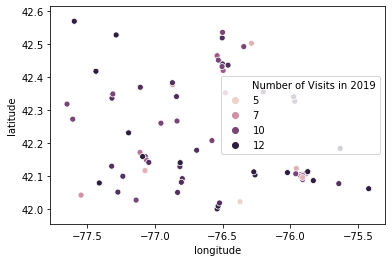

In [8]:
sns.scatterplot(x = 'longitude', y = 'latitude', data = sites, hue='Number of Visits in 2019')

In [9]:
foodMap = fm.Map(location=[42.3, -76.5], tiles='Stamen Toner', zoom_start = 9.2)
coordinates = sites[['latitude', 'longitude']]
coordinateList = coordinates.values.tolist()
print(coordinateList)
for element in coordinateList:
    fm.CircleMarker(element, radius=3, color='blue', opacity=0.3).add_to(foodMap)
foodMap

[[42.108036, -75.88777900000001], [42.4174468, -77.4358433], [42.3362172, -77.3175047], [42.2606415, -76.95598559999999], [42.172309000000006, -77.11012170000001], [42.1053841, -75.9213736], [42.3691309, -77.1081064], [42.231412899999995, -77.1948265], [42.272779, -77.606849], [42.1841905, -75.6329193], [42.1172594, -77.0735445], [42.419935100000004, -76.49696429999999], [42.502126000000004, -76.287671], [42.087090100000005, -75.8309647], [42.3522565, -76.4800051], [42.0625771, -75.422248], [42.111296, -76.02203], [42.178897799999994, -76.6922607], [42.1022814, -75.91295179999999], [42.1598551, -77.07113890000001], [42.5183206, -76.50355379999999], [42.028141999999995, -77.13925970000001], [42.267171999999995, -76.837356], [42.3409968, -76.8412703], [42.02302, -76.37179300000001], [42.1043411, -76.2615965], [42.527209899999995, -77.2866], [42.130625200000004, -77.31979150000001], [42.4919905, -76.3443272], [42.1000047, -75.92245940000001], [42.318273, -77.64936180000001], [42.355152200

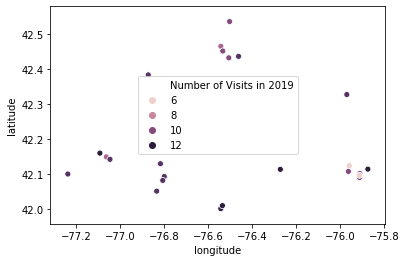

In [10]:
hotSites = sites[sites['Average Demand per Visit'] <= 100]
sns.scatterplot(x = 'longitude', y = 'latitude', data = hotSites, hue='Number of Visits in 2019')

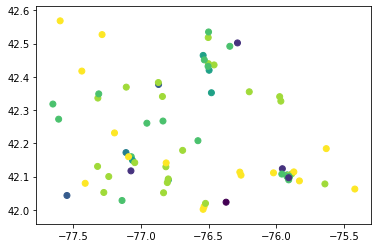

In [11]:
plt.scatter(x = 'longitude', y = 'latitude', data = sites, c='Number of Visits in 2019')

In [124]:
df = pd.read_csv('sites.csv')
dists = np.load('dists.npy')

stdevs = np.array((df['StDev(Demand per Visit)']))
variance = stdevs**2
stdevs = np.sqrt(np.matmul(variance,dists))
demands = np.array((df['Average Demand per Visit']))
increment = np.matmul(demands/28, dists) #how much demand increases every day


schedules = []
demandDist = []

factor = 0
nvisits = np.zeros(70)
ntrials = 10

while factor < 10:
    totalexcess = 0
    
    thislevelschedules = []
    for k in range(ntrials):
        optimal = [] #empty list for schedule
        
        demands = np.array((df['Average Demand per Visit']))
        daysElapsed = [0] * 70
        optimal = []
        excessdemand = 0
        
        for day in range(100):

            fx = [factor*x for x in daysElapsed]

            if not control:
                demands = demands + fx
                a = deepcopy(demands)
                a = np.sort(a)

                first = a[-1]
                index1 = np.where(demands == first)

                second = a[-2]
                index2 = np.where(demands == second)

                demands = demands - fx

                demand1 = random.normalvariate(demands[index1],stdevs[index1])
                demand2 = random.normalvariate(demands[index2],stdevs[index2])

                demands = (demands - min(demand1,300)*dists[index1])[0]
                demands = (demands - min(demand2,300)*dists[index2])[0]
                
                optimal.append([int(index1[0]),int(index2[0])])
                nvisits[index1] += 1
                nvisits[index2] +=1
                
                demands = [0 if x<0 else x for x in demands ]
                
            daysElapsed = [i + 1 for i in daysElapsed]
            daysElapsed[int(index1[0])] = 0
            daysElapsed[int(index2[0])] = 0

            demands = demands + increment
            excessdemand += sum(demands)
        
        totalexcess += excessdemand
        thislevelschedules.append(optimal)
        
    schedules.append(thislevelschedules)    
    demandDist.append(totalexcess/(365*ntrials))
    factor += 0.2

[2029.9847312620454, 2053.8868832972953, 2044.978365624923, 2008.7614264878687, 2054.5750363384786, 2007.198367848191, 2021.537500282917, 2053.4523995186432, 2028.058781897019, 2065.1097012758414, 2016.2810045103063, 2054.756505404809, 2053.149260436792, 2067.8125066213015, 2050.674937230117, 2058.7585090602906, 2036.610270537658, 2048.919870984002, 2040.0310290734355, 2033.8379792710648, 2061.189711878994, 2060.685177100009, 2033.3272747269236, 2078.8267349016764, 2057.657872338554, 2075.499525208847, 2071.0716783226912, 2031.0673168827632, 2056.005695416662, 2062.716198096631, 2061.5848826886904, 2043.5476558977457, 2082.4028452026255, 2097.111189021729, 2045.8069897936105, 2074.612978110725, 2090.10845060356, 2093.123461271671, 2092.330963877636, 2085.2635256461463, 2102.793310227174, 2092.019960442404, 2103.5771068358304, 2084.276896189091, 2097.4129643942542, 2117.9131623377584, 2137.1931544155873, 2129.7339129489283, 2072.452716846741, 2133.4992396682446, 2126.7590693779925]
[[[[

In [125]:
freqList = []
for level in schedules:
    freq = [0] * 70
    for trial in level:
        for day in trial:
            freq[day[0]] += 1
            freq[day[1]] += 1
    freqList.append(freq)

51

In [126]:
def gini(list):
    ## first sort
    arr = np.array(list)
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

def identify_pareto(scores):
    # Count number of items
    population_size = scores.shape[0]
    # Create a NumPy index for scores on the pareto front (zero indexed)
    population_ids = np.arange(population_size)
    # Create a starting list of items on the Pareto front
    # All items start off as being labelled as on the Parteo front
    pareto_front = np.ones(population_size, dtype=bool)
    # Loop through each item. This will then be compared with all other items
    for i in range(population_size):
        # Loop through all other items
        for j in range(population_size):
            # Check if our 'i' pint is dominated by our 'j' point
            if all(scores[j] < scores[i]) and any(scores[j] <= scores[i]):
                # j dominates i. Label 'i' point as not on Pareto front
                pareto_front[i] = 0
                # Stop further comparisons with 'i' (no more comparisons needed)
                break
    # Return ids of scenarios on pareto front
    return population_ids[pareto_front]

In [127]:
giniList = []
for i in freqList:
    giniList.append(gini(i))
giniList


51

In [128]:
minimize = np.column_stack((demandDist, giniList))
minimize

array([[2.02998473e+03, 4.36285714e-01],
       [2.05388688e+03, 4.25523810e-01],
       [2.04497837e+03, 4.20666667e-01],
       [2.00876143e+03, 4.10238095e-01],
       [2.05457504e+03, 3.99000000e-01],
       [2.00719837e+03, 3.82857143e-01],
       [2.02153750e+03, 3.62952381e-01],
       [2.05345240e+03, 3.65380952e-01],
       [2.02805878e+03, 3.34761905e-01],
       [2.06510970e+03, 3.23380952e-01],
       [2.01628100e+03, 3.12190476e-01],
       [2.05475651e+03, 3.07000000e-01],
       [2.05314926e+03, 3.03666667e-01],
       [2.06781251e+03, 3.04285714e-01],
       [2.05067494e+03, 2.93619048e-01],
       [2.05875851e+03, 2.87952381e-01],
       [2.03661027e+03, 2.83666667e-01],
       [2.04891987e+03, 2.80714286e-01],
       [2.04003103e+03, 2.77809524e-01],
       [2.03383798e+03, 2.73809524e-01],
       [2.06118971e+03, 2.75857143e-01],
       [2.06068518e+03, 2.72857143e-01],
       [2.03332727e+03, 2.74619048e-01],
       [2.07882673e+03, 2.71333333e-01],
       [2.057657

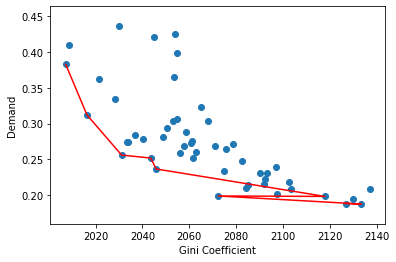

In [129]:
pareto = identify_pareto(minimize)
pareto_front = minimize[pareto]
x_all = minimize[:, 0]
y_all = minimize[:, 1]
x_pareto = pareto_front[:, 0]
y_pareto = pareto_front[:, 1]

plt.scatter(x_all, y_all)
plt.plot(x_pareto, y_pareto, color='r')
plt.xlabel('Gini Coefficient')
plt.ylabel('Demand')
plt.show()
